<img src="https://studenthub.atu.ie/assets/ATU_Logo.fa93bf0a.svg" alt="ATU Logo" width="300" height="100">

# **Project for 2024 Programming for Data Analytics (PFDA) module.**

## 1. Introduction / About this project
This is the project for the 2024 Programming for Data Analytics (PFDA) module. A description of the project can be found [here](https://github.com/andrewbeattycourseware/PFDA-courseware/blob/main/labs/Project%20Description.pdf). Initially, I was going to do a project on aviation but struggled to find usable datasets that were free of charge. Since we so often talk about the weather here in Ireland due to its erratic nature, I decided to explore it through analytics, touching upon as many suggestions as possible as per the project brief.

## 2. Imported libraries & modules:

### 2.1 [Pandas](https://pandas.pydata.org/) for data frames:
A fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. 
### 2.2 [Matplotlib](https://matplotlib.org/stable/) for plotting:
A comprehensive library for creating static, animated, and interactive visualizations.
### 2.3 [Seaborn](https://seaborn.pydata.org/)
Seaborn: statistical data visualization.
### 2.4 [Numpy](https://numpy.org/)
The fundamental package for scientific computing with Python.

In [205]:
# Data frames.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

## 3. Athenry weather station.
For the final assignment of the module, we analyzed the weather station in Athenry, which I have chosen to use again. This station records a diverse range of data points, as listed below the code cell in 3.1. Unfortunately, the Circular Road station, which is closest to where I live, and the station in Oughterard, do not include temperature measurements, for example. The data was downloaded from this website: https://www.met.ie/climate/available-data/historical-data.

### 3.1 Inspecting the dataset.

In [206]:
# Load the data sets.
file_path = r"C:\Users\User\ATU\PFDA\Project\mly1875.csv"
df = pd.read_csv(file_path, on_bad_lines='skip')

df

,Station Name: ATHENRY
0,Station Height: 40 M
1,year: - Year
2,month: - Month
3,rain: - Precipitation Amount (mm)
4,meant: - Mean Air Temperature (C)
5,maxtp: - Maximum Air Temperature (C)\t
6,mintp: - Minimum Air Temperature (C)\t
7,mnmax: - Mean Maximum Temperature (C)
8,mnmin: - Mean Minimum Temperature (C)
9,gmin: - Grass Minimum Temperature (C)


In [207]:
'''
print(df.head())
print(df.info())
'''

'\nprint(df.head())\nprint(df.info())\n'

In [208]:
type(df)

pandas.core.frame.DataFrame

### 3.2 Cleaning the dataset.
3.2.1 

In [209]:
df = pd.read_csv(file_path, skiprows=19)

df

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,2010,3,5.5,13.9,-5.7,9.9,1.1,73.3,-6.4,6.8,45,
1,2010,4,8.8,18.5,-1.8,13.8,3.9,76.8,-2.3,6.3,40,
2,2010,5,10.4,24.5,0.2,15.6,5.2,38.4,-0.3,6.1,28,
3,2010,6,14.7,22.1,4.3,19.5,9.9,28.3,3.6,6.6,28,
4,2010,7,15.1,20.0,6.9,18.2,12.0,155.5,7.3,7.7,37,
...,...,...,...,...,...,...,...,...,...,...,...,...
172,2024,7,14.6,22.2,6.3,19.0,10.3,71.5,3.6,5.9,26,
173,2024,8,14.7,21.7,5.8,18.4,11.0,159.0,2.4,7.6,33,
174,2024,9,12.9,24.0,2.1,17.0,8.7,46.6,-0.2,6.5,33,
175,2024,10,11.0,19.1,-0.5,14.8,7.1,112.7,-2.8,6.7,51,


In [210]:
print(df.dtypes)

year       int64
month      int64
meant    float64
maxtp    float64
mintp    float64
mnmax    float64
mnmin    float64
rain      object
gmin      object
wdsp     float64
maxgt      int64
sun       object
dtype: object


The data frames starts in March 2010 so I decided to remove those rows as well 2024 to only have complete years to work with:

In [211]:
df = df[df['year'].isin(range(2011, 2024))]
df

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
10,2011,1,3.1,12.1,-6.3,6.6,-0.4,110.8,-9.9,5.7,37,
11,2011,2,6.4,14.2,-3.6,10.0,2.8,146.5,-6.0,7.7,48,
12,2011,3,6.3,16.3,-4.8,11.2,1.4,44.2,-7.9,6.0,52,
13,2011,4,11.0,21.8,2.0,15.9,6.0,66.9,-0.7,7.1,34,
14,2011,5,11.0,18.3,4.1,14.3,7.8,117.6,0.7,11.1,47,
...,...,...,...,...,...,...,...,...,...,...,...,...
161,2023,8,15.4,24.9,6.6,19.1,11.7,129.1,4.7,6.8,33,
162,2023,9,14.6,27.7,3.8,19.1,10.2,148.2,1.7,6.1,36,
163,2023,10,11.0,20.7,-0.3,14.7,7.4,179.9,-3.1,6.2,32,
164,2023,11,7.6,13.7,-3.8,10.8,4.5,113.5,-4.1,6.8,62,


Calculate average rainfall per year.

In [212]:
# Ensure the 'rain' column is numeric.
df.loc[:, 'rain'] = pd.to_numeric(df['rain'], errors='coerce')

# Group by year and calculate average rainfall.
avg_rainfall_per_year = df.groupby('year')['rain'].mean().reset_index()

# Print the numeric output for each year's average rainfall.
print("Average Rainfall per Year:")
print(avg_rainfall_per_year)

Average Rainfall per Year:
    year        rain
0   2011  114.366667
1   2012  105.508333
2   2013   94.245455
3   2014  105.358333
4   2015  131.316667
5   2016   89.733333
6   2017       100.0
7   2018   90.183333
8   2019       118.9
9   2020  123.483333
10  2021   93.683333
11  2022   98.208333
12  2023  132.516667


Plot average rainfall per year on bar charts.

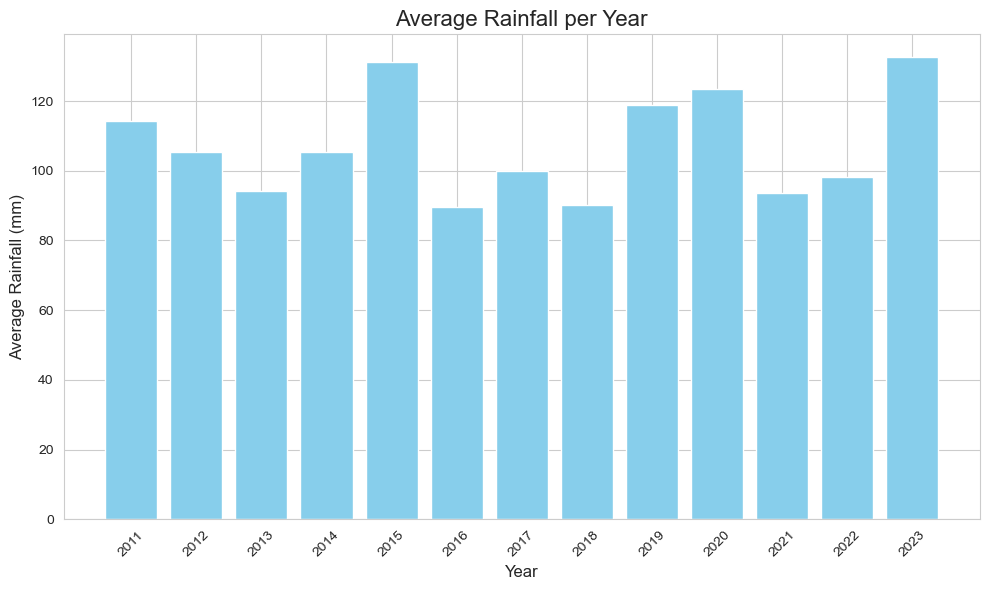

In [213]:
# Plot the bar chart for all years.
plt.figure(figsize=(10, 6))  # Set the figure size.
plt.bar(avg_rainfall_per_year['year'], avg_rainfall_per_year['rain'], color='skyblue')

# Title and labels.
plt.title('Average Rainfall per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rainfall (mm)', fontsize=12)
plt.xticks(avg_rainfall_per_year['year'], rotation=45)  # Rotate x-axis labels for better readability.

# Plot.
plt.tight_layout()
plt.show()

Average rainfall per year oscillates between under 100 mm in some years to way over 120 mm in other years. Let's have a look at the minimum and maximum averages per year.

In [214]:
# Group by year and calculate average, max, and min rainfall.
rainfall_stats = df.groupby('year')['rain'].agg(['mean', 'max', 'min']).reset_index()

# Print the numeric output for each year's rainfall statistics.
print("Rainfall Statistics per Year:")
print(rainfall_stats)

Rainfall Statistics per Year:
    year        mean    max   min
0   2011  114.366667  160.3  44.2
1   2012  105.508333  175.6  30.5
2   2013   94.245455  220.3  36.9
3   2014  105.358333  182.5  10.4
4   2015  131.316667  299.4  44.9
5   2016   89.733333  145.2  49.2
6   2017       100.0  157.7  13.5
7   2018   90.183333  173.2  25.2
8   2019       118.9  297.3  46.1
9   2020  123.483333  248.5  46.8
10  2021   93.683333  167.3  23.9
11  2022   98.208333  199.3  39.0
12  2023  132.516667  224.1  42.0


Create plot to display mean minimum and maximum in bar charts and overlay with line chart for average.

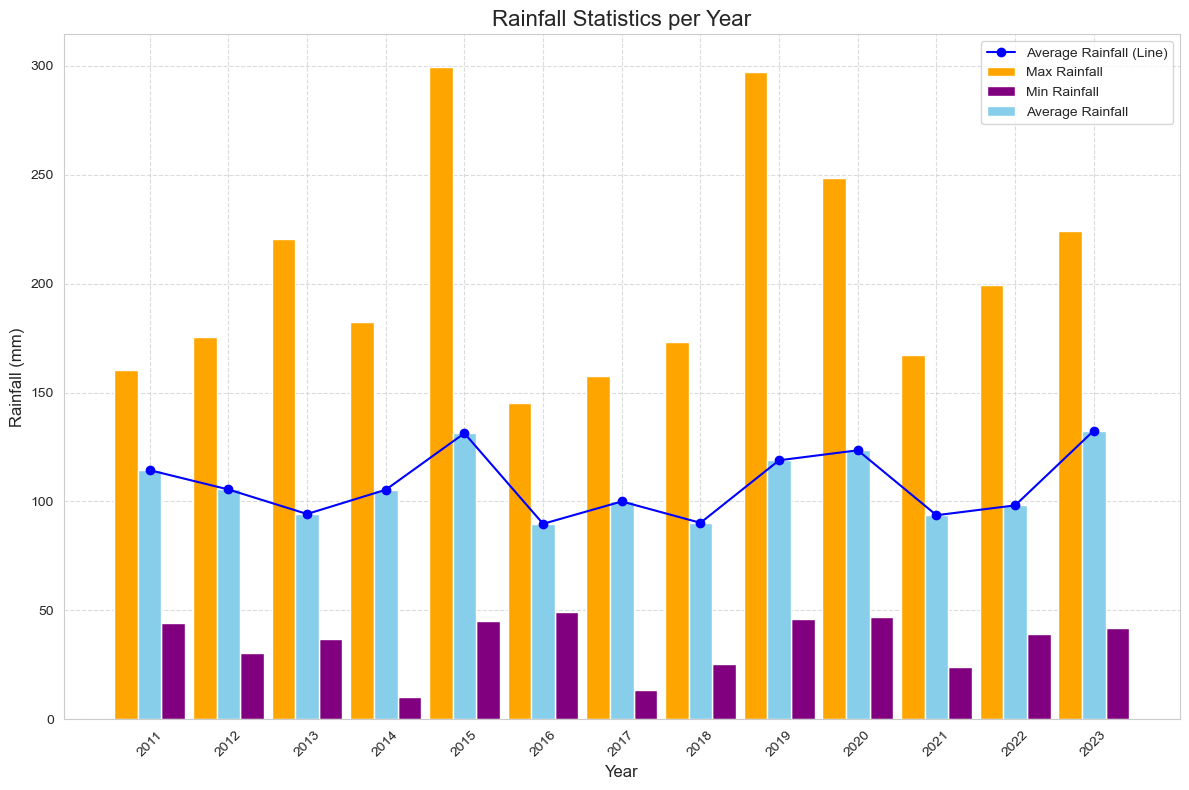

In [215]:
# Plot.
plt.figure(figsize=(12, 8))  # Set the figure size.

# Bar chart for max rainfall.
plt.bar(rainfall_stats['year'] - 0.3, rainfall_stats['max'], width=0.3, color='orange', label='Max Rainfall')

# Bar chart for min rainfall.
plt.bar(rainfall_stats['year'] + 0.3, rainfall_stats['min'], width=0.3, color='purple', label='Min Rainfall')

# Bar chart for average rainfall.
plt.bar(rainfall_stats['year'], rainfall_stats['mean'], width=0.3, color='skyblue', label='Average Rainfall')

# Line chart for average rainfall.
plt.plot(rainfall_stats['year'], rainfall_stats['mean'], marker='o', color='blue', linestyle='-', label='Average Rainfall (Line)')

# Title and labels.
plt.title('Rainfall Statistics per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)

# X-axis.
plt.xticks(rainfall_stats['year'], rotation=45)

# Legend.
plt.legend()

# Add a grid for better visualization.
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot.
plt.tight_layout()
plt.show()

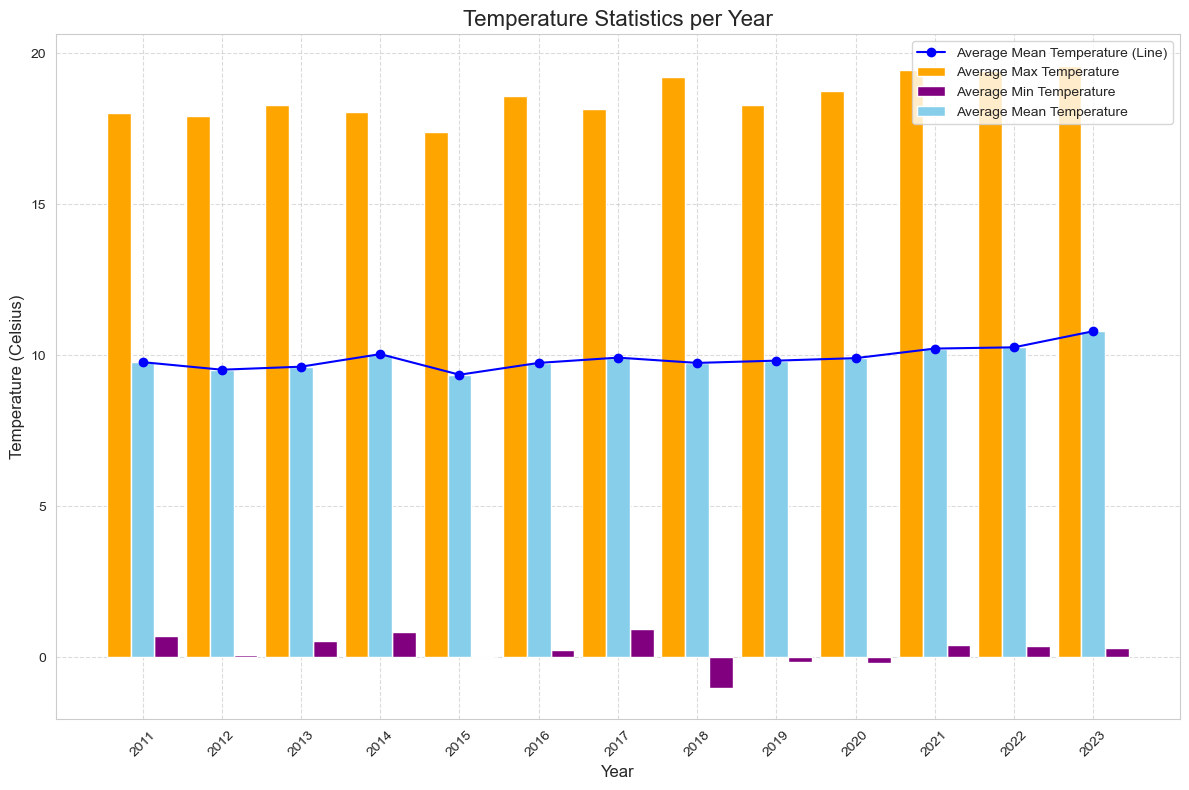

In [216]:
# Ensure the 'meant', 'maxtp', and 'mintp' columns are numeric.
df.loc[:, 'meant'] = pd.to_numeric(df['meant'], errors='coerce')
df.loc[:, 'maxtp'] = pd.to_numeric(df['maxtp'], errors='coerce')
df.loc[:, 'mintp'] = pd.to_numeric(df['mintp'], errors='coerce')

# Group by year and calculate the average temperature statistics.
temp_stats = df.groupby('year')[['meant', 'maxtp', 'mintp']].mean().reset_index()

# Plot.
plt.figure(figsize=(12, 8))  # Set the figure size.

# Bar chart for max temperature.
plt.bar(temp_stats['year'] - 0.3, temp_stats['maxtp'], width=0.3, color='orange', label='Average Max Temperature')

# Bar chart for min temperature.
plt.bar(temp_stats['year'] + 0.3, temp_stats['mintp'], width=0.3, color='purple', label='Average Min Temperature')

# Bar chart for mean temperature.
plt.bar(temp_stats['year'], temp_stats['meant'], width=0.3, color='skyblue', label='Average Mean Temperature')

# Line chart for mean temperature.
plt.plot(temp_stats['year'], temp_stats['meant'], marker='o', color='blue', linestyle='-', label='Average Mean Temperature (Line)')

# Title and labels.
plt.title('Temperature Statistics per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (Celsius)', fontsize=12)

# X-axis.
plt.xticks(temp_stats['year'], rotation=45)

# Legend.
plt.legend()

# Add a grid for better visualization.
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot.
plt.tight_layout()
plt.show()

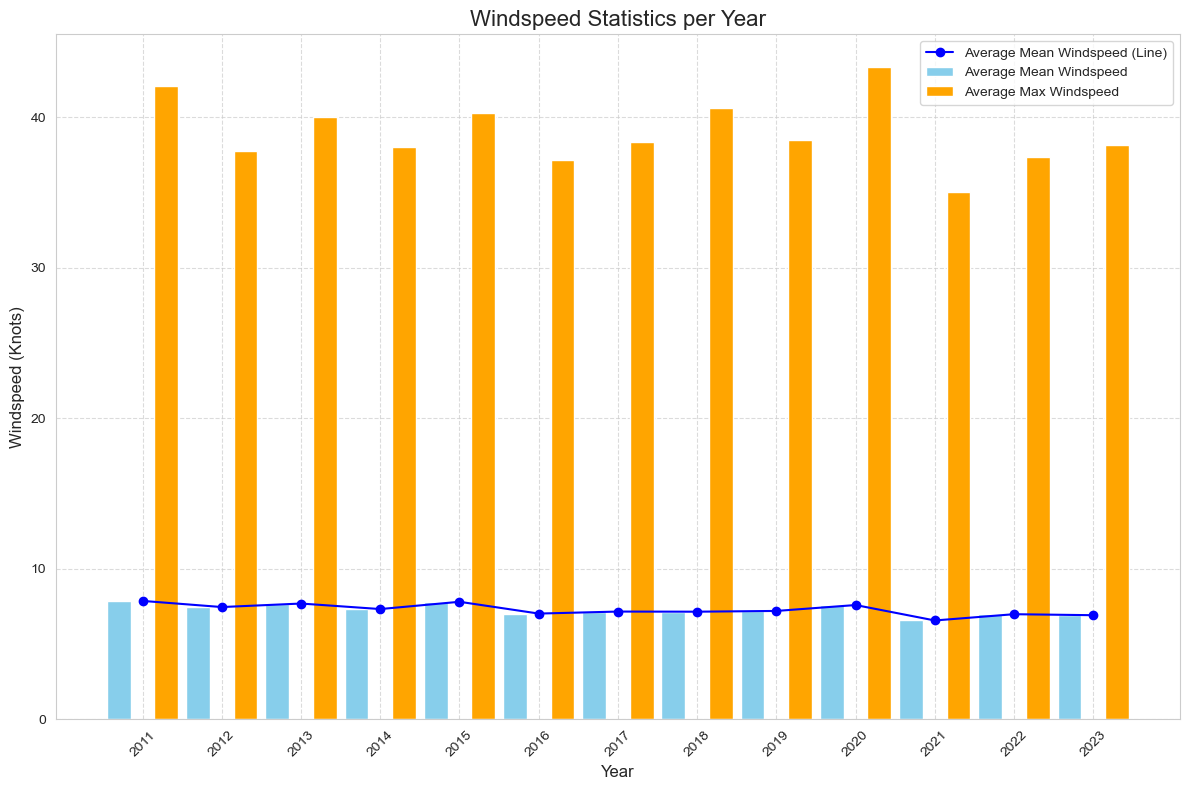

In [217]:
# Ensure the 'wdsp' and 'mxgt' columns are numeric.
df.loc[:, 'wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')
df.loc[:, 'maxgt'] = pd.to_numeric(df['maxgt'], errors='coerce')

# Group by year and calculate the average temperature statistics.
wdsp_stats = df.groupby('year')[['wdsp', 'maxgt']].mean().reset_index()

# Plot.
plt.figure(figsize=(12, 8))  # Set the figure size.

# Bar chart for max temperature.
plt.bar(wdsp_stats['year'] - 0.3, wdsp_stats['wdsp'], width=0.3, color='skyblue', label='Average Mean Windspeed')

# Bar chart for min temperature.
plt.bar(wdsp_stats['year'] + 0.3, wdsp_stats['maxgt'], width=0.3, color='orange', label='Average Max Windspeed')

# Line chart for mean temperature.
plt.plot(wdsp_stats['year'], wdsp_stats['wdsp'], marker='o', color='blue', linestyle='-', label='Average Mean Windspeed (Line)')

# Title and labels.
plt.title('Windspeed Statistics per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Windspeed (Knots)', fontsize=12)

# X-axis.
plt.xticks(wdsp_stats['year'], rotation=45)

# Legend.
plt.legend()

# Add a grid for better visualization.
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot.
plt.tight_layout()
plt.show()

We will analyze the metrics of average rainfall, temperature, and wind speed to determine if there is any correlation among them

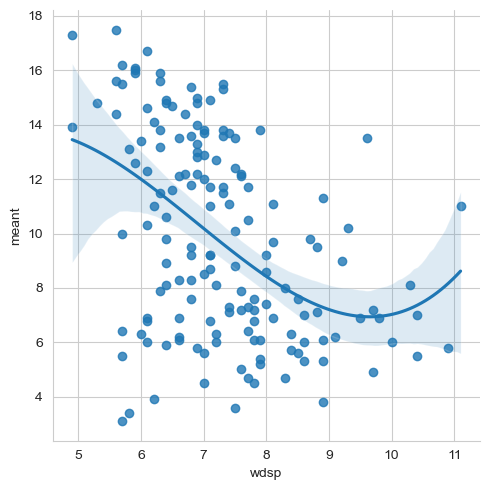

In [218]:
# Set style.
sns.set_style('whitegrid')
#sns.scatterplot(x='total_bill',y='tip',data=dataset)
#sns.regplot(x='total_bill', y='tip', order=1, data=dataset)
sns.lmplot(x='wdsp', y='meant', order=3, data=df)

plt.show()

UFuncTypeError: Cannot cast ufunc 'lstsq_n' input 1 from dtype('O') to dtype('float64') with casting rule 'same_kind'

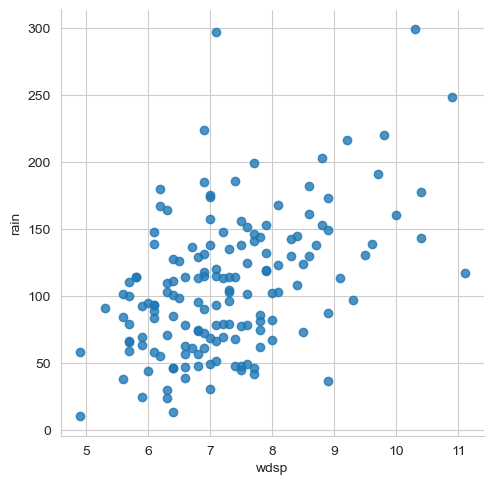

In [219]:
df.loc[:, 'rain'] = pd.to_numeric(df['rain'], errors='coerce')
# Set style.
sns.set_style('whitegrid')
#sns.scatterplot(x='total_bill',y='tip',data=dataset)
#sns.regplot(x='total_bill', y='tip', order=1, data=dataset)
sns.lmplot(x='wdsp', y='rain', order=3, data=df)

plt.show()

In [ ]:
print(df[['wdsp', 'rain', 'meant']].dtypes)
print(df[['wdsp', 'rain', 'meant']].isna().sum())
print(df[['wdsp', 'rain', 'meant']].info())



wdsp     float64
rain      object
meant    float64
dtype: object
wdsp     0
rain     0
meant    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 10 to 165
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wdsp    155 non-null    float64
 1   rain    155 non-null    object 
 2   meant   155 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.8+ KB
None


UFuncTypeError: Cannot cast ufunc 'lstsq_n' input 1 from dtype('O') to dtype('float64') with casting rule 'same_kind'

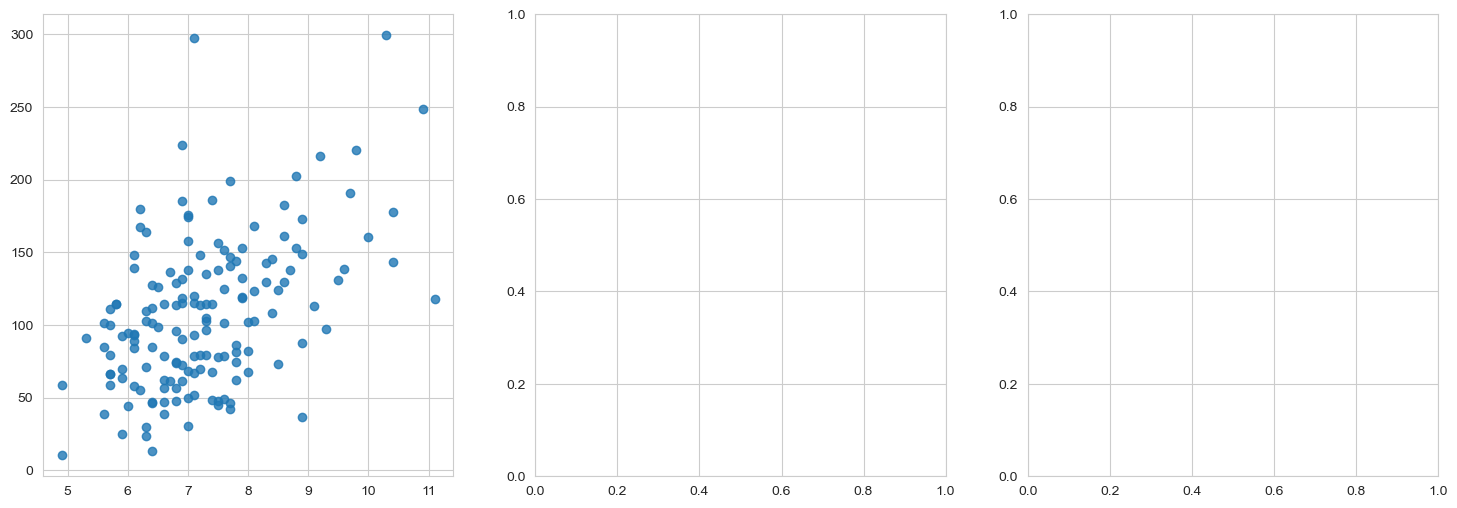

In [ ]:
# Ensure columns are numeric.
df.loc[:, 'wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')
df.loc[:, 'rain'] = pd.to_numeric(df['rain'], errors='coerce')
df.loc[:, 'meant'] = pd.to_numeric(df['meant'], errors='coerce')

# Handle missing values, drop rows with NaNs etc.
df = df.dropna(subset=['wdsp', 'rain', 'meant'])

# Set style.
sns.set_style('whitegrid')

# Create a figure with 3 subplots in a single row.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

plots = [
    ('wdsp', 'rain', 'Wind Speed vs Rainfall'),
    ('wdsp', 'meant', 'Wind Speed vs Mean Temperature'),
    ('rain', 'meant', 'Rainfall vs Mean Temperature'),
]

# Loop over the axes and data.
for ax, (x, y, title) in zip(axes, plots):
    # Scatter plot with regression line.
    sns.regplot(x=x, y=y, data=df, order=3, ax=ax)
    ax.set_title(title, fontsize=14)
    
    # Calculate and display correlation coefficient.
    corr_coef = np.corrcoef(df[x].dropna(), df[y].dropna())[0, 1]
    ax.annotate(f'Corr: {corr_coef:.2f}', xy=(0.5, -0.15), xycoords='axes fraction', 
                ha='center', fontsize=12, color='black')

# Adjust layout.
plt.tight_layout()
plt.show()


In [194]:
df.loc[:, 'rain'] = pd.to_numeric(df['rain'], errors='coerce')

In [195]:
print(df[['wdsp', 'rain', 'meant']].dtypes)

wdsp     float64
rain      object
meant    float64
dtype: object


In [200]:
print(df['rain'].dtypes)  # Should show object
print(df['rain'].unique())  # Check for unexpected or problematic values

object
[110.8 146.5 44.2 66.9 117.6 135.2 55.3 94.7 138.8 149.2 152.9 160.3 131.1
 62.3 30.5 74.8 48.2 175.6 115.3 114.2 101.4 127.7 131.8 153.2 132.2 46.5
 36.9 97.2 61.4 101.5 72.8 47.9 120.0 100.0 220.3 182.5 177.7 103.1 47.6
 38.6 92.4 104.9 10.4 140.9 139.0 124.1 191.1 68.7 129.9 138.0 44.9 138.2
 114.6 93.3 66.6 216.3 299.4 145.2 129.8 79.4 49.2 56.7 101.1 85.1 96.3
 58.4 59.1 78.5 47.4 87.5 142.6 13.5 119.5 136.8 118.3 123.3 88.9 157.7
 173.2 78.0 81.4 82.2 62.5 25.2 69.7 126.1 98.8 73.8 86.3 125.0 84.1 73.5
 161.4 67.7 46.1 71.0 297.3 185.3 115.0 111.4 144.3 118.7 248.5 108.2 46.8
 49.6 67.9 174.3 109.8 90.3 168.0 148.1 151.6 167.3 113.4 102.1 23.9 95.7
 29.8 58.5 84.8 91.1 164.0 78.9 114.7 56.9 143.1 39.0 51.6 66.0 79.6 199.3
 156.2 114.3 113.9 42.0 185.9 93.4 63.5 93.8 224.1 129.1 148.2 179.9 113.5
 202.9]


In [201]:
non_numeric_rows = df[~df['rain'].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric_rows)


Empty DataFrame
Columns: [year, month, meant, maxtp, mintp, mnmax, mnmin, rain, gmin, wdsp, maxgt, sun]
Index: []


In [188]:
print(df[['wdsp', 'rain', 'meant']].info())
print(df[['wdsp', 'rain', 'meant']].head(10))
print(df[['wdsp', 'rain', 'meant']].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 10 to 165
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wdsp    155 non-null    float64
 1   rain    155 non-null    object 
 2   meant   155 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.8+ KB
None
    wdsp   rain  meant
10   5.7  110.8    3.1
11   7.7  146.5    6.4
12   6.0   44.2    6.3
13   7.1   66.9   11.0
14  11.1  117.6   11.0
15   7.3  135.2   11.7
16   6.2   55.3   14.1
17   6.0   94.7   13.4
18   9.6  138.8   13.5
19   8.9  149.2   11.3
wdsp     0
rain     0
meant    0
dtype: int64


In [220]:
problematic_rows = df[df['rain'].isnull()]
print(problematic_rows)

    year  month  meant  maxtp  mintp  mnmax  mnmin rain  gmin  wdsp  maxgt sun
37  2013      4    7.2   15.6   -4.2   11.5    2.9  NaN  -9.2   9.7     44    


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html